In [27]:
import numpy as np
import gensim
#import re
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

In [28]:
f = open('../data/Text/Shakespear/shakespear.txt')
ds = f.read()
f.close()

In [29]:
#all these char are replaced by an empty string,basically they are removed
syms = ['"', ';', ':', ',', '?', '!', '&', '(', ')', '[', ']', "'", '$', '@', '~', '-', '#']
#these are replaced by a space
syms_2 = ['\n', '\t', '_', '>', '<']

In [30]:
data = []
#entire text is separated by a full stop
for ix in ds.split('.')[:]:
    val = ix
    for s in syms:
        val = val.strip().replace(s, '')
    for s in syms_2:
        val = val.strip().replace(s, ' ')
        #very small and very large values are replaced
    if len(val) < 500 and len(val) > 40:
        data.append(val.lower())

In [31]:
#f = np.unique(data, return_counts=True)
#print f

In [32]:
#plt.figure(0, figsize=(10, 10))
#plt.plot(f[0], f[1])

In [33]:
train = []
#when ever split is called without any arameter the words are seperated
#we need to pass the data in a wrord list formt in gensim
for ix in data[:]:
    train.append(ix.lower().split())
    #print '-'*80

In [34]:
#number fo workers is number of threads (parallisation)
model = gensim.models.Word2Vec(train, workers=6, iter=20)
#model file is a binary file

In [35]:
model.similar_by_word('mystery')

/home/shubhijain/.local/lib/python2.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `similar_by_word` (Method will be removed in 4.0.0, use self.wv.similar_by_word() instead).
  """Entry point for launching an IPython kernel.


[('affair', 0.7268182039260864),
 ('problem', 0.6781928539276123),
 ('episode', 0.5876146554946899),
 ('investigation', 0.5873347520828247),
 ('chain', 0.5864372253417969),
 ('business', 0.5827729105949402),
 ('matter', 0.561525821685791),
 ('press', 0.5610217452049255),
 ('series', 0.5607579350471497),
 ('case', 0.5592632293701172)]

In [36]:
w = 'horse car engine travel'.split()
# model.similarity?

In [37]:
m = np.zeros((len(w), len(w)))
for ix in range(len(w)):
    for wx in range(len(w)):
        #for each element we store the similarity score for each element with each element
        m[ix, wx] = model.similarity(w[ix], w[wx])

/home/shubhijain/.local/lib/python2.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  """


['horse', 'car', 'engine', 'travel']


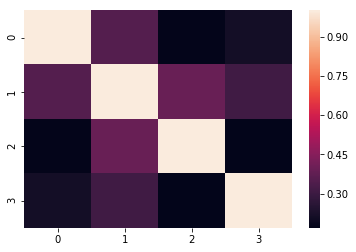

In [38]:
print w
sns.heatmap(m)

In [39]:
m.sum(axis=0)

array([1.74147865, 2.05719239, 1.73837519, 1.69433284])

In [40]:
import spacy
#spacy.load?

In [41]:
#glove is a data set-GLOBAL VECTORS (trained over 6 million words) its word length is 100
word_embeddings = spacy.load('en', vectors='glove.6B.300d.txt')

In [61]:
#the srting to be passed should be unicode (u) represents the unicode
q = word_embeddings(u'what')
print q.vector.reshape((-1, 1))

[[-2.77933049e+00]
 [ 9.62309778e-01]
 [ 3.52229309e+00]
 [ 8.30319524e-01]
 [ 3.87283134e+00]
 [-5.44438601e-01]
 [-4.84119028e-01]
 [ 1.72013605e+00]
 [ 3.22194815e-01]
 [ 1.36324811e+00]
 [ 1.19217420e+00]
 [-1.20870686e+00]
 [ 1.02263021e+00]
 [-1.37045765e+00]
 [-1.49330831e+00]
 [ 1.67875183e+00]
 [ 1.70461118e-01]
 [-1.67501533e+00]
 [-6.17178082e-02]
 [ 2.68307972e+00]
 [ 1.76389605e-01]
 [ 1.36839962e+00]
 [ 2.76607609e+00]
 [ 3.15783501e+00]
 [-2.39867330e+00]
 [-1.54991841e+00]
 [-9.79093015e-01]
 [-5.61284304e-01]
 [ 5.42019606e-01]
 [-1.78987205e-01]
 [ 2.57267761e+00]
 [-6.63191259e-01]
 [-4.85075355e-01]
 [-1.67551148e+00]
 [-1.64025560e-01]
 [-4.31711406e-01]
 [-3.22239709e+00]
 [ 4.05230665e+00]
 [-5.00178480e+00]
 [ 1.01608503e+00]
 [ 8.84964585e-01]
 [-1.49029821e-01]
 [ 4.34480476e+00]
 [-5.13068557e-01]
 [-4.53103304e+00]
 [ 3.26352745e-01]
 [ 1.04753530e+00]
 [-2.75907397e-01]
 [ 7.68843293e-01]
 [-1.45202792e+00]
 [-5.43428957e-01]
 [-2.16257787e+00]
 [ 5.1031529

In [46]:
from sklearn.metrics.pairwise import cosine_similarity

In [62]:
#takes two unicode words
def sim(w1, w2):
    v1 = word_embeddings(w1)
    v2 = word_embeddings(w2)
    
    return cosine_similarity(v1.vector.reshape(1,-1), v2.vector.reshape(1,-1))

In [65]:
import sklearn
sklearn.__version__

'0.19.1'

In [63]:
word1 = u'money'
word2 = u'luxury'
print sim(word1, word2)

[[0.7375301]]


In [ ]:
#for opposite